## Import Necessary Packages

In [14]:
!pip install colorthief pandas pillow matplotlib

## Import Dataset

In [16]:
import pandas as pd

df = pd.read_csv("Sephora_Lip_Products_Image_Data.csv")

# Preview the dataset
print(df.columns)
print(df[['brand', 'price','name', 'image']].head())

print(df['image'].head()) 

Index(['brand', 'detail_link', 'id', 'image', 'name', 'price',
       'quantity_rating', 'rating'],
      dtype='object')
             brand   price                                              name  \
0   Summer Fridays  $24.00             Lip Butter Balm for Hydration & Shine   
1  Tower 28 Beauty  $16.00  ShineOn Lip Jelly Hydrating Non-Sticky Lip Gloss   
2          LANEIGE  $22.00          Glaze Craze Tinted Polypeptide Lip Serum   
3             DIOR  $40.00                                      Lip Glow Oil   
4         Glossier  $16.00               Balm Dotcom Lip Balm and Skin Salve   

                                               image  
0  https://www.sephora.com/productimages/sku/s274...  
1  https://www.sephora.com/productimages/sku/s254...  
2  https://www.sephora.com/productimages/sku/s284...  
3  https://www.sephora.com/productimages/sku/s231...  
4  https://www.sephora.com/productimages/sku/s283...  
0    https://www.sephora.com/productimages/sku/s274...
1    https:/

## EDA

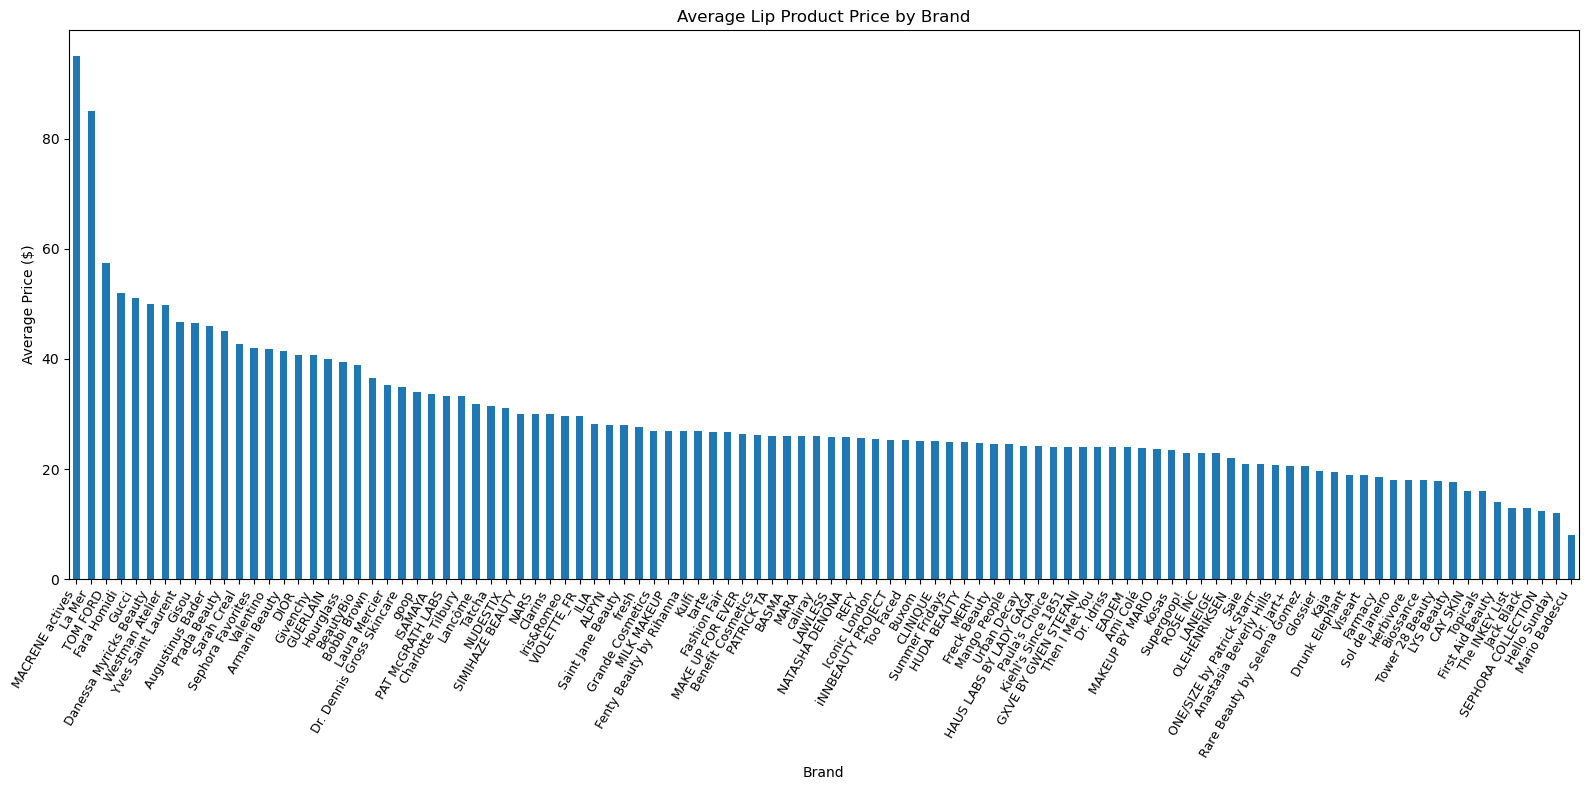

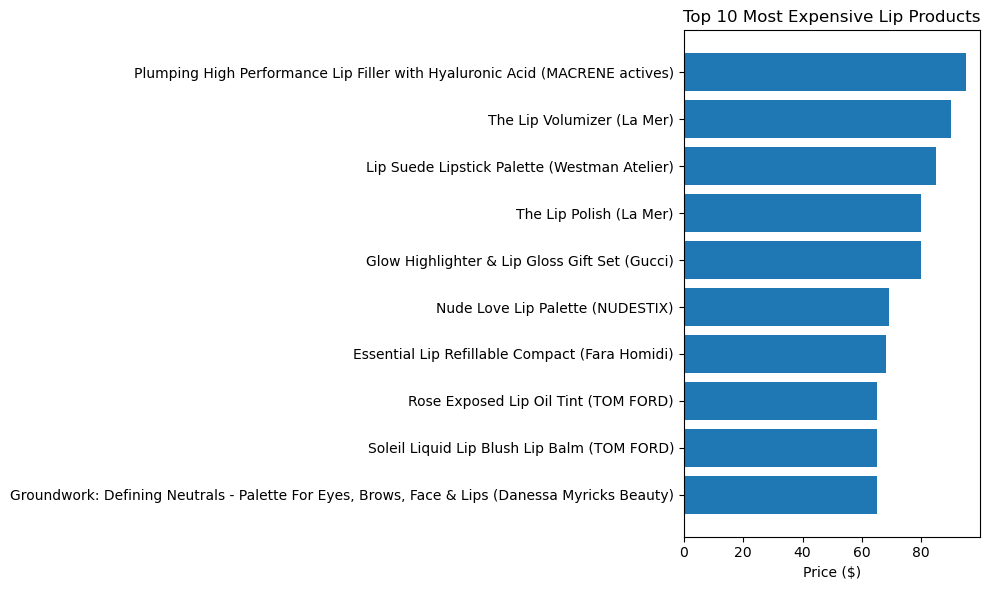

In [28]:
# Clean price column if needed
def clean_price(price):
    if pd.isna(price):
        return np.nan
    # Remove dollar signs and commas
    price = price.replace('$', '').replace(',', '').strip()
    # Handle ranges like "18.00 - 24.00"
    if '-' in price:
        parts = price.split('-')
        try:
            low = float(parts[0].strip())
            high = float(parts[1].strip())
            return round((low + high) / 2, 2)
        except:
            return np.nan
    else:
        try:
            return float(price)
        except:
            return np.nan

# Apply cleaning
df['price'] = df['price'].astype(str).apply(clean_price)

# Optional: drop rows with missing or invalid price
df = df.dropna(subset=['price'])

# Average Price by Brand
brand_avg = df.groupby('brand')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(16, 8))
brand_avg.plot(kind='bar')
plt.title('Average Lip Product Price by Brand')
plt.ylabel('Average Price ($)')
plt.xlabel('Brand')
plt.xticks(rotation=60, ha='right', fontsize=9)
plt.tight_layout()
plt.show()

# Top 10 Most Expensive Products
top_products = df[['name', 'brand', 'price']].sort_values(by='price', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_products['name'] + " (" + top_products['brand'] + ")", top_products['price'])
plt.title('Top 10 Most Expensive Lip Products')
plt.xlabel('Price ($)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Pre-processing Image Data 

In [22]:
import pandas as pd
import requests
import os
from urllib.parse import urlparse

# Load your CSV
df = pd.read_csv("Sephora_Lip_Products_Image_Data.csv")

# Choose the right column name
image_column = "image"  # adjust if it's named differently
SAVE_DIR = "working_lip_images"
os.makedirs(SAVE_DIR, exist_ok=True)

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0 Safari/537.36",
    "Referer": "https://www.sephora.com/"
}

for i, row in df.iterrows():
    url = str(row[image_column]).strip()
    try:
        if not url.startswith("http"):
            print(f"Skipping invalid URL: {url}")
            continue

        # Clean URL
        parsed = urlparse(url)
        ext = os.path.splitext(parsed.path)[-1]
        filename = f"lip_{i}{ext if ext else '.jpg'}"
        filepath = os.path.join(SAVE_DIR, filename)

        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code == 200:
            with open(filepath, 'wb') as f:
                f.write(response.content)
            print(f"[✓] Saved: {filename}")
            df.at[i, 'local_path'] = filepath
        else:
            print(f"Status {response.status_code}: {url}")

    except Exception as e:
        print(f"Error: {e} | URL: {url}")

[✓] Saved: lip_0.jpg
[✓] Saved: lip_1.jpg
[✓] Saved: lip_2.jpg
[✓] Saved: lip_3.jpg
[✓] Saved: lip_4.jpg
[✓] Saved: lip_5.jpg
[✓] Saved: lip_6.jpg
[✓] Saved: lip_7.jpg
[✓] Saved: lip_8.jpg
[✓] Saved: lip_9.jpg
[✓] Saved: lip_10.jpg
[✓] Saved: lip_11.jpg
[✓] Saved: lip_12.jpg
[✓] Saved: lip_13.jpg
[✓] Saved: lip_14.jpg
[✓] Saved: lip_15.jpg
[✓] Saved: lip_16.jpg
[✓] Saved: lip_17.jpg
[✓] Saved: lip_18.jpg
[✓] Saved: lip_19.jpg
[✓] Saved: lip_20.jpg
[✓] Saved: lip_21.jpg
[✓] Saved: lip_22.jpg
[✓] Saved: lip_23.jpg
[✓] Saved: lip_24.jpg
[✓] Saved: lip_25.jpg
[✓] Saved: lip_26.jpg
[✓] Saved: lip_27.jpg
[✓] Saved: lip_28.jpg
[✓] Saved: lip_29.jpg
[✓] Saved: lip_30.jpg
[✓] Saved: lip_31.jpg
[✓] Saved: lip_32.jpg
[✓] Saved: lip_33.jpg
[✓] Saved: lip_34.jpg
[✓] Saved: lip_35.jpg
[✓] Saved: lip_36.jpg
[✓] Saved: lip_37.jpg
[✓] Saved: lip_38.jpg
[✓] Saved: lip_39.jpg
[✓] Saved: lip_40.jpg
[✓] Saved: lip_41.jpg
[✓] Saved: lip_42.jpg
[✓] Saved: lip_43.jpg
[✓] Saved: lip_44.jpg
[✓] Saved: lip_45.jp

## Lip Product Shade/Color Analysis and Visualizations

In [24]:
from colorthief import ColorThief
import colorsys

def rgb_to_hsl(r, g, b):
    r /= 255
    g /= 255
    b /= 255
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    return int(h * 360), s, l

def classify_shade(h, s, l):
    if s < 0.2 and l > 0.7:
        return "Nude"
    elif 0 <= h <= 10 or 350 <= h <= 360:
        return "Red"
    elif 10 < h <= 40:
        return "Coral"
    elif 240 <= h <= 280:
        return "Purple"
    elif 280 < h <= 330:
        return "Berry"
    elif 330 < h < 350:
        return "Pink"
    else:
        return "Other"

dominant_colors = []
shade_classes = []

for path in df['local_path']:
    try:
        ct = ColorThief(path)
        rgb = ct.get_color(quality=1)
        h, s, l = rgb_to_hsl(*rgb)
        shade = classify_shade(h, s, l)
        dominant_colors.append(rgb)
        shade_classes.append(shade)
    except Exception as e:
        dominant_colors.append((0,0,0))
        shade_classes.append("Unknown")

df['dominant_rgb'] = dominant_colors
df['shade'] = shade_classes

/var/folders/tw/lt2fg6r16lx2jyxgsjbwxjx40000gn/T/ipykernel_59904/2248176646.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='shade', order=df_filtered['shade'].value_counts().index, palette='pastel')


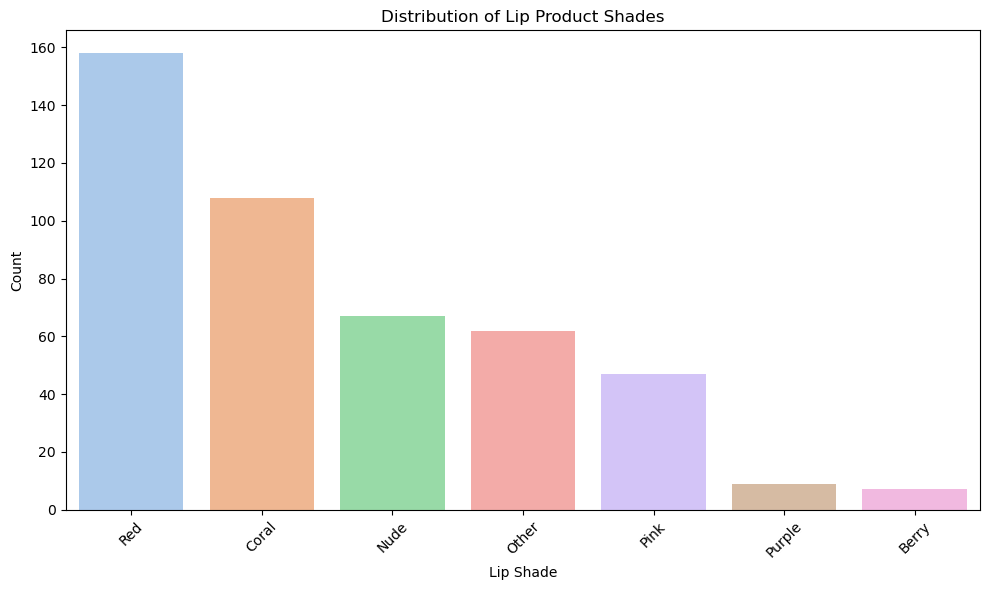

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out 'Unknown' shades for clarity
df_filtered = df[df['shade'] != 'Unknown']

# Count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='shade', order=df_filtered['shade'].value_counts().index, palette='pastel')

plt.title('Distribution of Lip Product Shades')
plt.xlabel('Lip Shade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

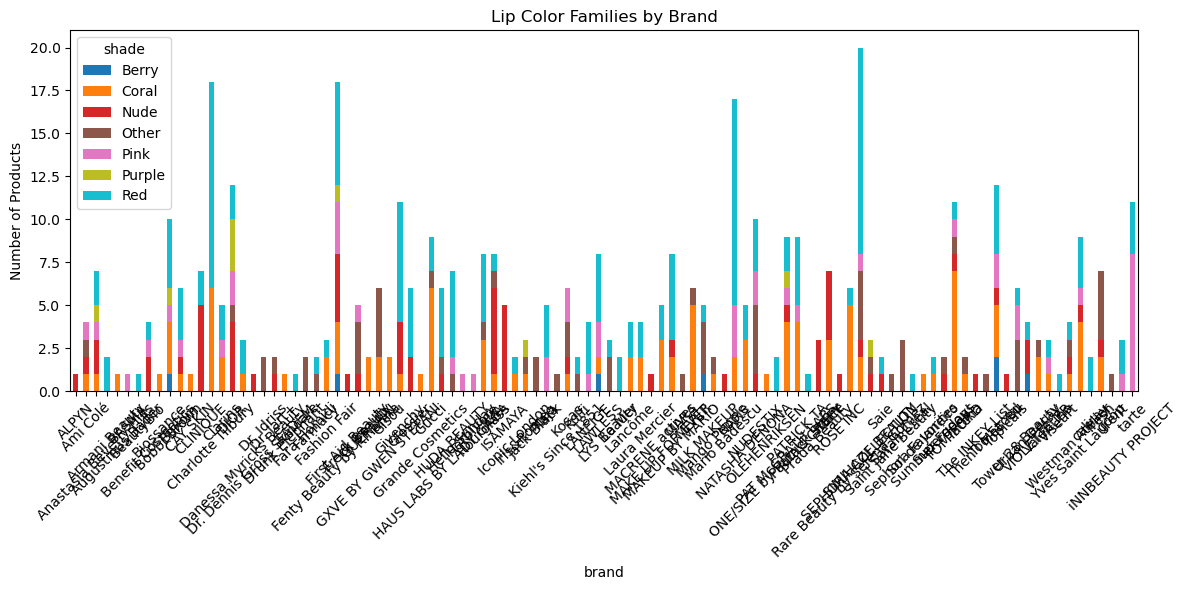

In [36]:
import matplotlib.pyplot as plt

pivot = df.groupby(['brand', 'shade']).size().unstack(fill_value=0)
pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title("Lip Color Families by Brand")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Regression with Rating on Lip Products Colors

In [38]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out 'Unknown' shades
df_clean = df[df['shade'] != 'Unknown'].copy()

# Ensure 'rating' is numeric
df_clean['rating'] = pd.to_numeric(df_clean['rating'], errors='coerce')

# Drop missing values
df_clean = df_clean.dropna(subset=['rating', 'shade'])

# One-hot encode shade
shade_dummies = pd.get_dummies(df_clean['shade'], drop_first=True)

# Combine with intercept
X_shade = sm.add_constant(shade_dummies)

# Make sure all values are numeric float64 (avoid object dtype)
X_shade = X_shade.astype(float)
y_rating = df_clean['rating'].astype(float)

# Run regression
model = sm.OLS(y_rating, X_shade).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.366
Date:                Fri, 18 Apr 2025   Prob (F-statistic):              0.227
Time:                        15:21:33   Log-Likelihood:                -497.86
No. Observations:                 458   AIC:                             1010.
Df Residuals:                     451   BIC:                             1039.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3486      0.273     15.911      0.0

## Regression with Price on Lip Products Colors

In [40]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out 'Unknown' shades
df_clean = df[df['shade'] != 'Unknown'].copy()

# Ensure 'rating' is numeric
df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')

# Drop missing values
df_clean = df_clean.dropna(subset=['price', 'shade'])

# One-hot encode shade
shade_dummies = pd.get_dummies(df_clean['shade'], drop_first=True)

# Combine with intercept
X_shade = sm.add_constant(shade_dummies)

# Make sure all values are numeric float64 (avoid object dtype)
X_shade = X_shade.astype(float)
y_rating = df_clean['price'].astype(float)

# Run regression
model = sm.OLS(y_rating, X_shade).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.777
Date:                Fri, 18 Apr 2025   Prob (F-statistic):             0.0116
Time:                        15:21:36   Log-Likelihood:                -1794.1
No. Observations:                 458   AIC:                             3602.
Df Residuals:                     451   BIC:                             3631.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7857      4.632      5.351      0.0

## CNN Model to Predict Product Popularity by Lip Product Colors

In [47]:
import numpy as np
# Drop rows with missing values for safety
df = df.dropna(subset=['rating', 'quantity_rating'])

# Step 2: Define Popularity Score
# Combine rating and review count into a score (log to reduce skew)
df['popularity_score'] = df['rating'] * np.log1p(df['quantity_rating'])

# Step 3: Label as popular if above median score
threshold = df['popularity_score'].median()
df['label'] = (df['popularity_score'] > threshold).astype(int)

# Step 4: Save labels to use in image classification
df['image'] = [f"lip_{i}.jpg" for i in range(len(df))]
df[['image', 'label']].to_csv('labels.csv', index=False)

# --------- CNN Model Below ---------
!pip install torch torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from PIL import Image
from torchvision import transforms
from sklearn.metrics import classification_report, confusion_matrix

# Custom PyTorch dataset class
class LipDataset(Dataset):
    def __init__(self, csv_file, img_dir, img_size=128):
        self.data = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transforms.Compose([
            transforms.Resize((img_size, img_size)),
            transforms.ToTensor(),
        ])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.data.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')
        image = self.transform(image)
        label = torch.tensor(self.data.iloc[idx, 1], dtype=torch.float32)
        return image, label.unsqueeze(0)

# Load dataset
dataset = LipDataset("labels.csv", "/Users/lisabu/Documents/UVA/Courses/DS 4002/Sephora_Lip")  # images/ contains all lip product images

# Train-test split
from torch.utils.data import random_split
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_ds, test_ds = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32)

# Define CNN model
class LipNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
        )
        self.fc = nn.Sequential(
            nn.Linear(64 * 32 * 32, 128), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(128, 1), nn.Sigmoid()
        )

    def forward(self, x):
        x = self.cnn(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LipNet().to(device)
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(458):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = loss_fn(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} Loss: {total_loss / len(train_loader):.4f}")

# Evaluate
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        preds = model(xb.to(device)).cpu().numpy()
        y_true += yb.numpy().flatten().tolist()
        y_pred += (preds > 0.5).astype(int).flatten().tolist()

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

Epoch 1 Loss: 1.2234
Epoch 2 Loss: 0.6929
Epoch 3 Loss: 0.6894
Epoch 4 Loss: 0.6821
Epoch 5 Loss: 0.6749
Epoch 6 Loss: 0.6474
Epoch 7 Loss: 0.6116
Epoch 8 Loss: 0.5770
Epoch 9 Loss: 0.5409
Epoch 10 Loss: 0.5342
Epoch 11 Loss: 0.5109
Epoch 12 Loss: 0.4603
Epoch 13 Loss: 0.4163
Epoch 14 Loss: 0.3930
Epoch 15 Loss: 0.3543
Epoch 16 Loss: 0.3386
Epoch 17 Loss: 0.3169
Epoch 18 Loss: 0.2942
Epoch 19 Loss: 0.3039
Epoch 20 Loss: 0.2518
Epoch 21 Loss: 0.2218
Epoch 22 Loss: 0.2093
Epoch 23 Loss: 0.1834
Epoch 24 Loss: 0.1556
Epoch 25 Loss: 0.1475
Epoch 26 Loss: 0.1345
Epoch 27 Loss: 0.1272
Epoch 28 Loss: 0.1618
Epoch 29 Loss: 0.1151
Epoch 30 Loss: 0.0981
Epoch 31 Loss: 0.0852
Epoch 32 Loss: 0.0719
Epoch 33 Loss: 0.0785
Epoch 34 Loss: 0.0905
Epoch 35 Loss: 0.0719
Epoch 36 Loss: 0.0588
Epoch 37 Loss: 0.0467
Epoch 38 Loss: 0.0542
Epoch 39 Loss: 0.0456
Epoch 40 Loss: 0.0398
Epoch 41 Loss: 0.0376
Epoch 42 Loss: 0.0334
Epoch 43 Loss: 0.0455
Epoch 44 Loss: 0.0497
Epoch 45 Loss: 0.0343
Epoch 46 Loss: 0.05